In [25]:
from pynq import Overlay
import numpy as np
from pynq import allocate
from pynq.lib import dma
from scipy.linalg import dft
import matplotlib.pyplot as plt

In [26]:
ol=Overlay('design_1_good.bit')

In [27]:
ol?

In [28]:
dma1=ol.axi_dma_0
dma2=ol.axi_dma_1

In [29]:
NUM_SAMPLES = 164

real_error=np.zeros(NUM_SAMPLES)
imag_error=np.zeros(NUM_SAMPLES)
ind=np.arange(NUM_SAMPLES)
real_rmse=np.zeros(NUM_SAMPLES)
imag_rmse=np.zeros(NUM_SAMPLES)

In [35]:
# Allocate regular numpy arrays to store input and output
# data = np.fromfile("input_file.dat", dtype=np.int16)
in_I = allocate(shape=(50,), dtype=np.int16)
in_Q = allocate(shape=(50,), dtype=np.int16)
# Separate data into dataI and dataQ
# for i in range(NUM_SAMPLES):
#     in_I[i] = 1  # Every other element starting from the first (index 0)
#     in_Q[i] = 0
with open("input_file.dat", "rb") as file:
    # Read data from the file
    data = np.fromfile(file, dtype=np.int16)

# Populate in_I and in_Q arrays directly without using append
for i in range(50):
    in_I[i] = data[2*i]    # Every other element starting from the first
    in_Q[i] = data[2*i + 1]  # Every other element starting from the second

    

print(in_I)
print(in_Q)

out_I = allocate(shape=(NUM_SAMPLES,), dtype=np.int16) 
out_Q = allocate(shape=(NUM_SAMPLES,), dtype=np.int16)

[1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0
 0 0 1 0 0 1 0 1 1 0 1 0 0]
[1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1
 1 1 1 0 0 1 0 0 0 1 1 1 0]


In [36]:
transmitter_ip = ol.transmitter_0
transmitter_ip.write(0x00,1)
dma2.recvchannel.start()
dma2.sendchannel.start()                # Start the DMA send and recv channels.
dma1.recvchannel.start()
dma1.sendchannel.start()

dma2.recvchannel.transfer(out_I)        #Send and recv data 
dma2.sendchannel.transfer(in_Q)
dma1.recvchannel.transfer(out_Q)
dma1.sendchannel.transfer(in_I)

dma2.recvchannel.wait()
dma2.sendchannel.wait()                # Wait for the DMA to send and recv data.
dma1.recvchannel.wait()
dma1.sendchannel.wait()

In [37]:
print(out_I)
print(out_I.shape)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1  1  1
 -1  1  1  1 -1 -1  1 -1  1  1 -1  1 -1  1  1 -1 -1  1  1  1  1  1 -1 -1
 -1  1 -1 -1  1 -1  1 -1  1  1  1  1 -1  1  1  1  1 -1 -1 -1  1  1 -1  1
  1  1  1  1 -1  1 -1  1  1  1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1  1
  1 -1  1 -1  1 -1  1 -1  1 -1  1  1  1  1  1 -1 -1 -1 -1 -1]
(164,)


In [38]:
print(out_Q)
print(out_Q.shape)

[ 1  1  1  1 -1  1 -1 -1 -1  1  1  1 -1 -1  1  1  1 -1 -1  1 -1 -1  1 -1
 -1 -1 -1  1 -1  1 -1  0 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1  1  1 -1
  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1  1 -1 -1  1 -1
 -1 -1 -1 -1 -1  1  1 -1  1  1 -1 -1 -1  1  1 -1 -1  1  1  1  1 -1 -1  1
  1  1 -1  1  1 -1  1  1  1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1  1  1 -1 -1
 -1  1  1 -1 -1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1
  1  1 -1 -1  1  1  1  1  1 -1 -1  1  1 -1  1  1  1  1 -1 -1]
(164,)


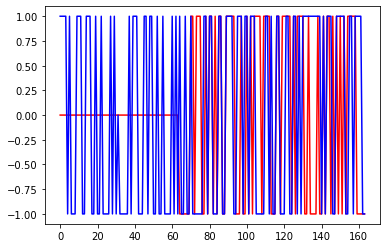

In [39]:
plt.plot(out_I, "r")
plt.plot(out_Q, "b")
plt.show()

